In [1]:
# Setting working directory as HOME
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [2]:
# Installing yolov8 

!pip install git+https://github.com/LakshmySanthosh/yolov8_depthwise_separable_conv.git

  Cloning https://github.com/LakshmySanthosh/yolov8_depthwise_separable_conv.git to /tmp/pip-req-build-xtcyasqd
  Running command git clone --filter=blob:none --quiet https://github.com/LakshmySanthosh/yolov8_depthwise_separable_conv.git /tmp/pip-req-build-xtcyasqd
  Resolved https://github.com/LakshmySanthosh/yolov8_depthwise_separable_conv.git to commit c197ea9c55071599250f7d0d1e4e531bbd779122
  Preparing metadata (setup.py) ... done
  Created wheel for ultralytics: filename=ultralytics-8.0.81-py3-none-any.whl size=533781 sha256=03467da19ba655fce29085856edb0735b603425850387cee294d06d00fb2492c
  Stored in directory: /tmp/pip-ephem-wheel-cache-2s_bj5ln/wheels/2e/98/e9/3bd591d3f607e7f5065214f37c63ad50e774c41e4d065c1ff7
Successfully built ultralytics


In [3]:
#importing libraries

from ultralytics import YOLO
from IPython.display import display, Image

In [4]:
# uploading dataset from roboflow

!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="THT9CtDUDzP7TPxM9CuV")
project = rf.workspace("projects-phgy0").project("thz")
version = project.version(4)
dataset = version.download("yolov8")

/kaggle/working/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.9/74.9 kB 1.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 2.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 29.4 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.12.1
  Attempting uninstall: certifi
 


Extracting Dataset Version Zip to thz-4 in yolov8:: 100%|██████████| 25924/25924 [00:02<00:00, 9117.47it/s] 


In [5]:
print(os.getcwd())
%cd {HOME}

/kaggle/working/datasets
/kaggle/working


In [6]:

!git clone https://github.com/LakshmySanthosh/yolov8_depthwise_separable_conv/

Cloning into 'yolov8_depthwise_separable_conv'...
remote: Enumerating objects: 13453, done.
remote: Total 13453 (delta 0), reused 0 (delta 0), pack-reused 13453
Receiving objects: 100% (13453/13453), 6.33 MiB | 18.57 MiB/s, done.
Resolving deltas: 100% (9332/9332), done.


In [7]:
#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [8]:
%cat /kaggle/working/datasets/thz-4/data.yaml

names:
- A4paper
- AK
- AK_noMagazine
- M16
- axe
- beltholster
- bottle
- candyboxLid
- cigaretteBox
- fomka
- glassjar
- hammerAndSickle
- handGranade
- knife
- meatKnife
- phoneNokia
- phoneXiaomi
- pistol
- saucepanLid
- shoulderholster
- tin
- usbDisk
nc: 22
roboflow:
  license: CC BY 4.0
  project: thz
  url: https://universe.roboflow.com/projects-phgy0/thz/dataset/4
  version: 4
  workspace: projects-phgy0
test: ../test/images
train: thz-4/train/images
val: thz-4/valid/images


In [9]:
%%writetemplate /kaggle/working/datasets/thz-4/datanew.yaml

names:
- A4paper
- AK
- AK_noMagazine
- M16
- axe
- beltholster
- bottle
- candyboxLid
- cigaretteBox
- fomka
- glassjar
- hammerAndSickle
- handGranade
- knife
- meatKnife
- phoneNokia
- phoneXiaomi
- pistol
- saucepanLid
- shoulderholster
- tin
- usbDisk
nc: 22
roboflow:
  license: CC BY 4.0
  project: thz
  url: https://universe.roboflow.com/projects-phgy0/thz/dataset/4
  version: 4
  workspace: projects-phgy0
test: ../test/images
train: ../train/images
val: ../valid/images

In [10]:
#this is the model configuration we will use for our tutorial 
%cat /kaggle/working/yolov8_depthwise_separable_conv/ultralytics/models/v8/yolov8.yaml

# Ultralytics YOLO 🚀, AGPL-3.0 license
# YOLOv8 object detection model with P3-P5 outputs. For Usage examples see https://docs.ultralytics.com/tasks/detect

# Parameters
nc: 80  # number of classes
scales: # model compound scaling constants, i.e. 'model=yolov8n.yaml' will call yolov8.yaml with scale 'n'
  # [depth, width, max_channels]
  n: [0.33, 0.25, 1024]  # YOLOv8n summary: 225 layers,  3157200 parameters,  3157184 gradients,   8.9 GFLOPs
  s: [0.33, 0.50, 1024]  # YOLOv8s summary: 225 layers, 11166560 parameters, 11166544 gradients,  28.8 GFLOPs
  m: [0.67, 0.75, 768]   # YOLOv8m summary: 295 layers, 25902640 parameters, 25902624 gradients,  79.3 GFLOPs
  l: [1.00, 1.00, 512]   # YOLOv8l summary: 365 layers, 43691520 parameters, 43691504 gradients, 165.7 GFLOPs
  x: [1.00, 1.25, 512]   # YOLOv8x summary: 365 layers, 68229648 parameters, 68229632 gradients, 258.5 GFLOPs

# YOLOv8.0n backbone
backbone:
  # [from, repeats, module, args]
  - [-1, 1, Conv, [64, 3, 2]]  # 0-P1/2
  - [-

In [11]:
%%writetemplate /kaggle/working/yolov8_depthwise_separable_conv/ultralytics/models/v8/yolov8_custom.yaml

# Parameters
nc: 22 # number of classes
scales: # model compound scaling constants, i.e. 'model=yolov8n.yaml' will call yolov8.yaml with scale 'n'
  # [depth, width, max_channels]
  #n: [0.33, 0.25, 1024] # YOLOv8n summary: 225 layers,  3157200 parameters,  3157184 gradients,   8.9 GFLOPs
  #s: [0.33, 0.50, 1024] # YOLOv8s summary: 225 layers, 11166560 parameters, 11166544 gradients,  28.8 GFLOPs
  m: [0.67, 0.75, 768] # YOLOv8m summary: 295 layers, 25902640 parameters, 25902624 gradients,  79.3 GFLOPs
  #l: [1.00, 1.00, 512] # YOLOv8l summary: 365 layers, 43691520 parameters, 43691504 gradients, 165.7 GFLOPs
  #x: [1.00, 1.25, 512] # YOLOv8x summary: 365 layers, 68229648 parameters, 68229632 gradients, 258.5 GFLOPs

# YOLOv8.0n backbone
backbone:
  # [from, repeats, module, args]
  - [-1, 1, DWSConv, [64, 3, 2]] # 0-P1/2
  - [-1, 1, DWSConv, [128, 3, 2]] # 1-P2/4
  - [-1, 3, C2f, [128, True]]
  - [-1, 1, DWSConv, [256, 3, 2]] # 3-P3/8
  - [-1, 6, C2f, [256, True]]
  - [-1, 1, DWSConv, [512, 3, 2]] # 5-P4/16
  - [-1, 6, C2f, [512, True]]
  - [-1, 1, DWSConv, [1024, 3, 2]] # 7-P5/32
  - [-1, 3, C2f, [1024, True]]
  - [-1, 1, SPPF, [1024, 5]] # 9

# YOLOv8.0n head
head:
  - [-1, 1, nn.Upsample, [None, 2, "nearest"]]
  - [[-1, 6], 1, Concat, [1]] # cat backbone P4
  - [-1, 3, C2f, [512]] # 12

  - [-1, 1, nn.Upsample, [None, 2, "nearest"]]
  - [[-1, 4], 1, Concat, [1]] # cat backbone P3
  - [-1, 3, C2f, [256]] # 15 (P3/8-small)

  - [-1, 1, DWSConv, [256, 3, 2]]
  - [[-1, 12], 1, Concat, [1]] # cat head P4
  - [-1, 3, C2f, [512]] # 18 (P4/16-medium)

  - [-1, 1, DWSConv, [512, 3, 2]]
  - [[-1, 9], 1, Concat, [1]] # cat head P5
  - [-1, 3, C2f, [1024]] # 21 (P5/32-large)

  - [[15, 18, 21], 1, Detect, [nc]] # Detect(P3, P4, P5)

In [12]:
%cat /kaggle/working/yolov8_depthwise_separable_conv/ultralytics/models/v8/yolov8_custom.yaml


# Parameters
nc: 22 # number of classes
scales: # model compound scaling constants, i.e. 'model=yolov8n.yaml' will call yolov8.yaml with scale 'n'
  # [depth, width, max_channels]
  #n: [0.33, 0.25, 1024] # YOLOv8n summary: 225 layers,  3157200 parameters,  3157184 gradients,   8.9 GFLOPs
  #s: [0.33, 0.50, 1024] # YOLOv8s summary: 225 layers, 11166560 parameters, 11166544 gradients,  28.8 GFLOPs
  m: [0.67, 0.75, 768] # YOLOv8m summary: 295 layers, 25902640 parameters, 25902624 gradients,  79.3 GFLOPs
  #l: [1.00, 1.00, 512] # YOLOv8l summary: 365 layers, 43691520 parameters, 43691504 gradients, 165.7 GFLOPs
  #x: [1.00, 1.25, 512] # YOLOv8x summary: 365 layers, 68229648 parameters, 68229632 gradients, 258.5 GFLOPs

# YOLOv8.0n backbone
backbone:
  # [from, repeats, module, args]
  - [-1, 1, DWSConv, [64, 3, 2]] # 0-P1/2
  - [-1, 1, DWSConv, [128, 3, 2]] # 1-P2/4
  - [-1, 3, C2f, [128, True]]
  - [-1, 1, DWSConv, [256, 3, 2]] # 3-P3/8
  - [-1, 6, C2f, [256, True]]
  - [-1, 1, DWSConv

In [13]:
!echo "Y" | pip uninstall wandb==0.16.3

Found existing installation: wandb 0.16.3
Uninstalling wandb-0.16.3:
  Would remove:
    /opt/conda/bin/wandb
    /opt/conda/bin/wb
    /opt/conda/lib/python3.10/site-packages/wandb-0.16.3.dist-info/*
    /opt/conda/lib/python3.10/site-packages/wandb/*
Proceed (Y/n)?   Successfully uninstalled wandb-0.16.3


In [14]:
!pip install comet-ml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.1/663.1 kB 4.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 979.1/979.1 kB 18.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 43.0 MB/s eta 0:00:0000:0100:01


In [15]:
# training YOLOv8
%time 
!yolo task=detect mode=train model=/kaggle/working/yolov8_depthwise_separable_conv/ultralytics/models/v8/yolov8_custom.yaml data={dataset.location}/datanew.yaml pretrained=False epochs=25 imgsz=416 plots=True name=/kaggle/working/runs/detect/dws_yolov8m_results cache=True 

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.44 µs
WARNING ⚠️ no model scale passed. Assuming scale='m'.

                   from  n    params  module                                       arguments                     
  0                  -1  1       267  ultralytics.nn.modules.DWSConv               [3, 48, 3, 2]                 
  1                  -1  1      5232  ultralytics.nn.modules.DWSConv               [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.C2f                   [96, 96, 2, True]             
  3                  -1  1     19680  ultralytics.nn.modules.DWSConv               [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.C2f                   [192, 192, 4, True]           
  5                  -1  1     76224  ultralytics.nn.modules.DWSConv               [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.C2f                   

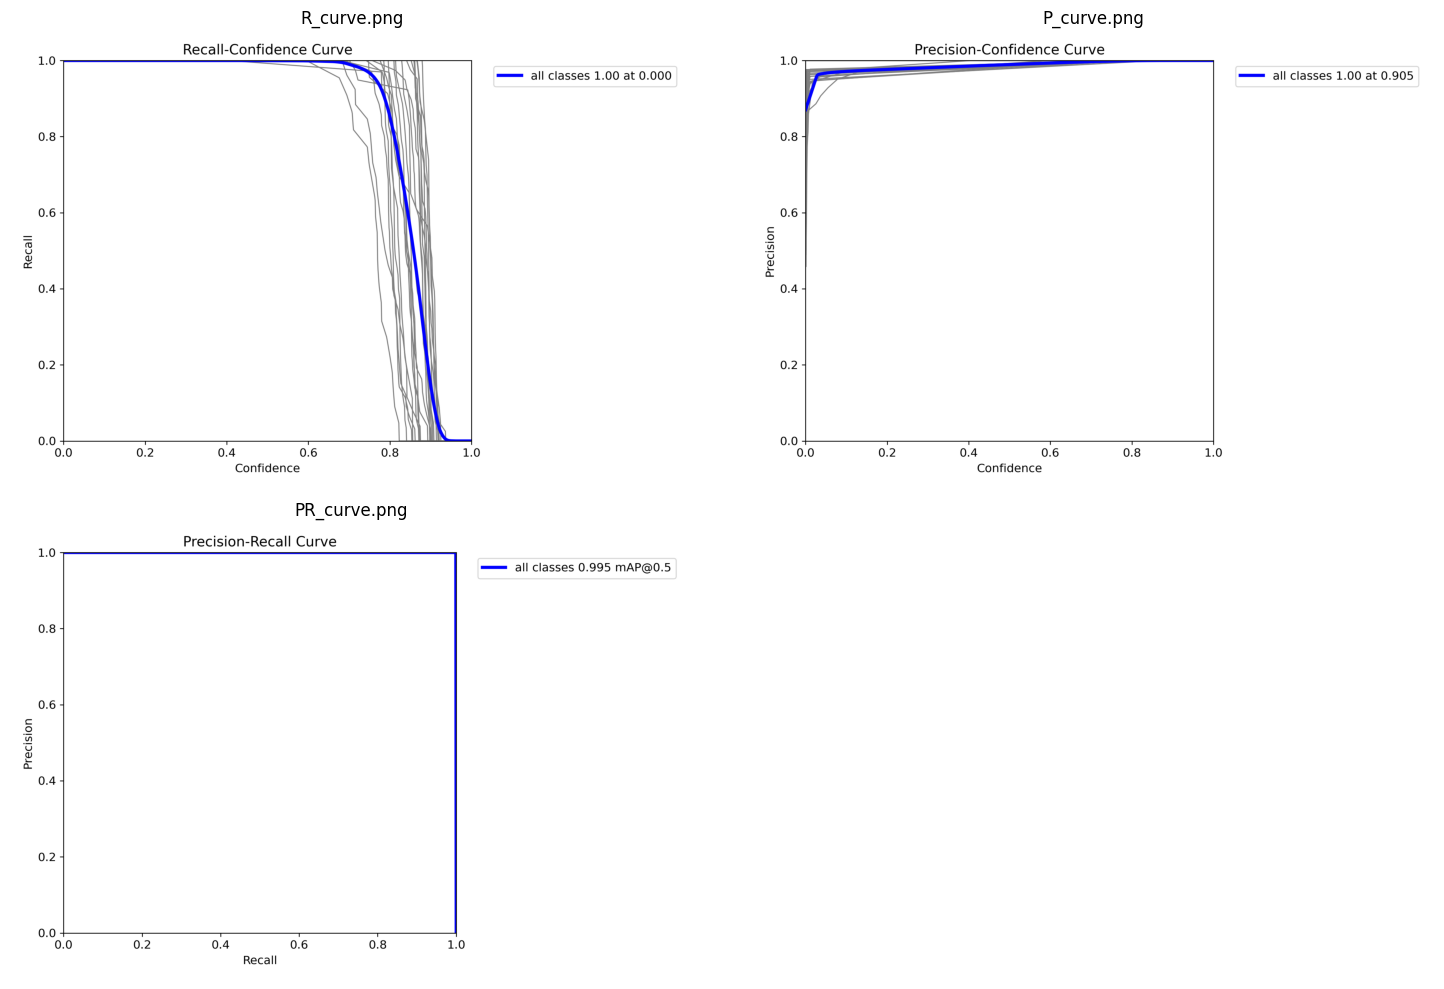

In [16]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_dir = '/kaggle/working/runs/detect/dws_yolov8m_results'
specific_names = ['R_curve.png','P_curve.png','PR_curve.png']  
num_rows = (len(specific_names) + 1) // 2  

plt.figure(figsize=(15, num_rows * 5))  
for i, image_name in enumerate(specific_names):
    image_path = os.path.join(image_dir, image_name)
    if os.path.exists(image_path):
        img = mpimg.imread(image_path)
        plt.subplot(num_rows, 2, i+1) 
        plt.imshow(img)
        plt.title(image_name)
        plt.axis('off')

plt.tight_layout()
plt.show()

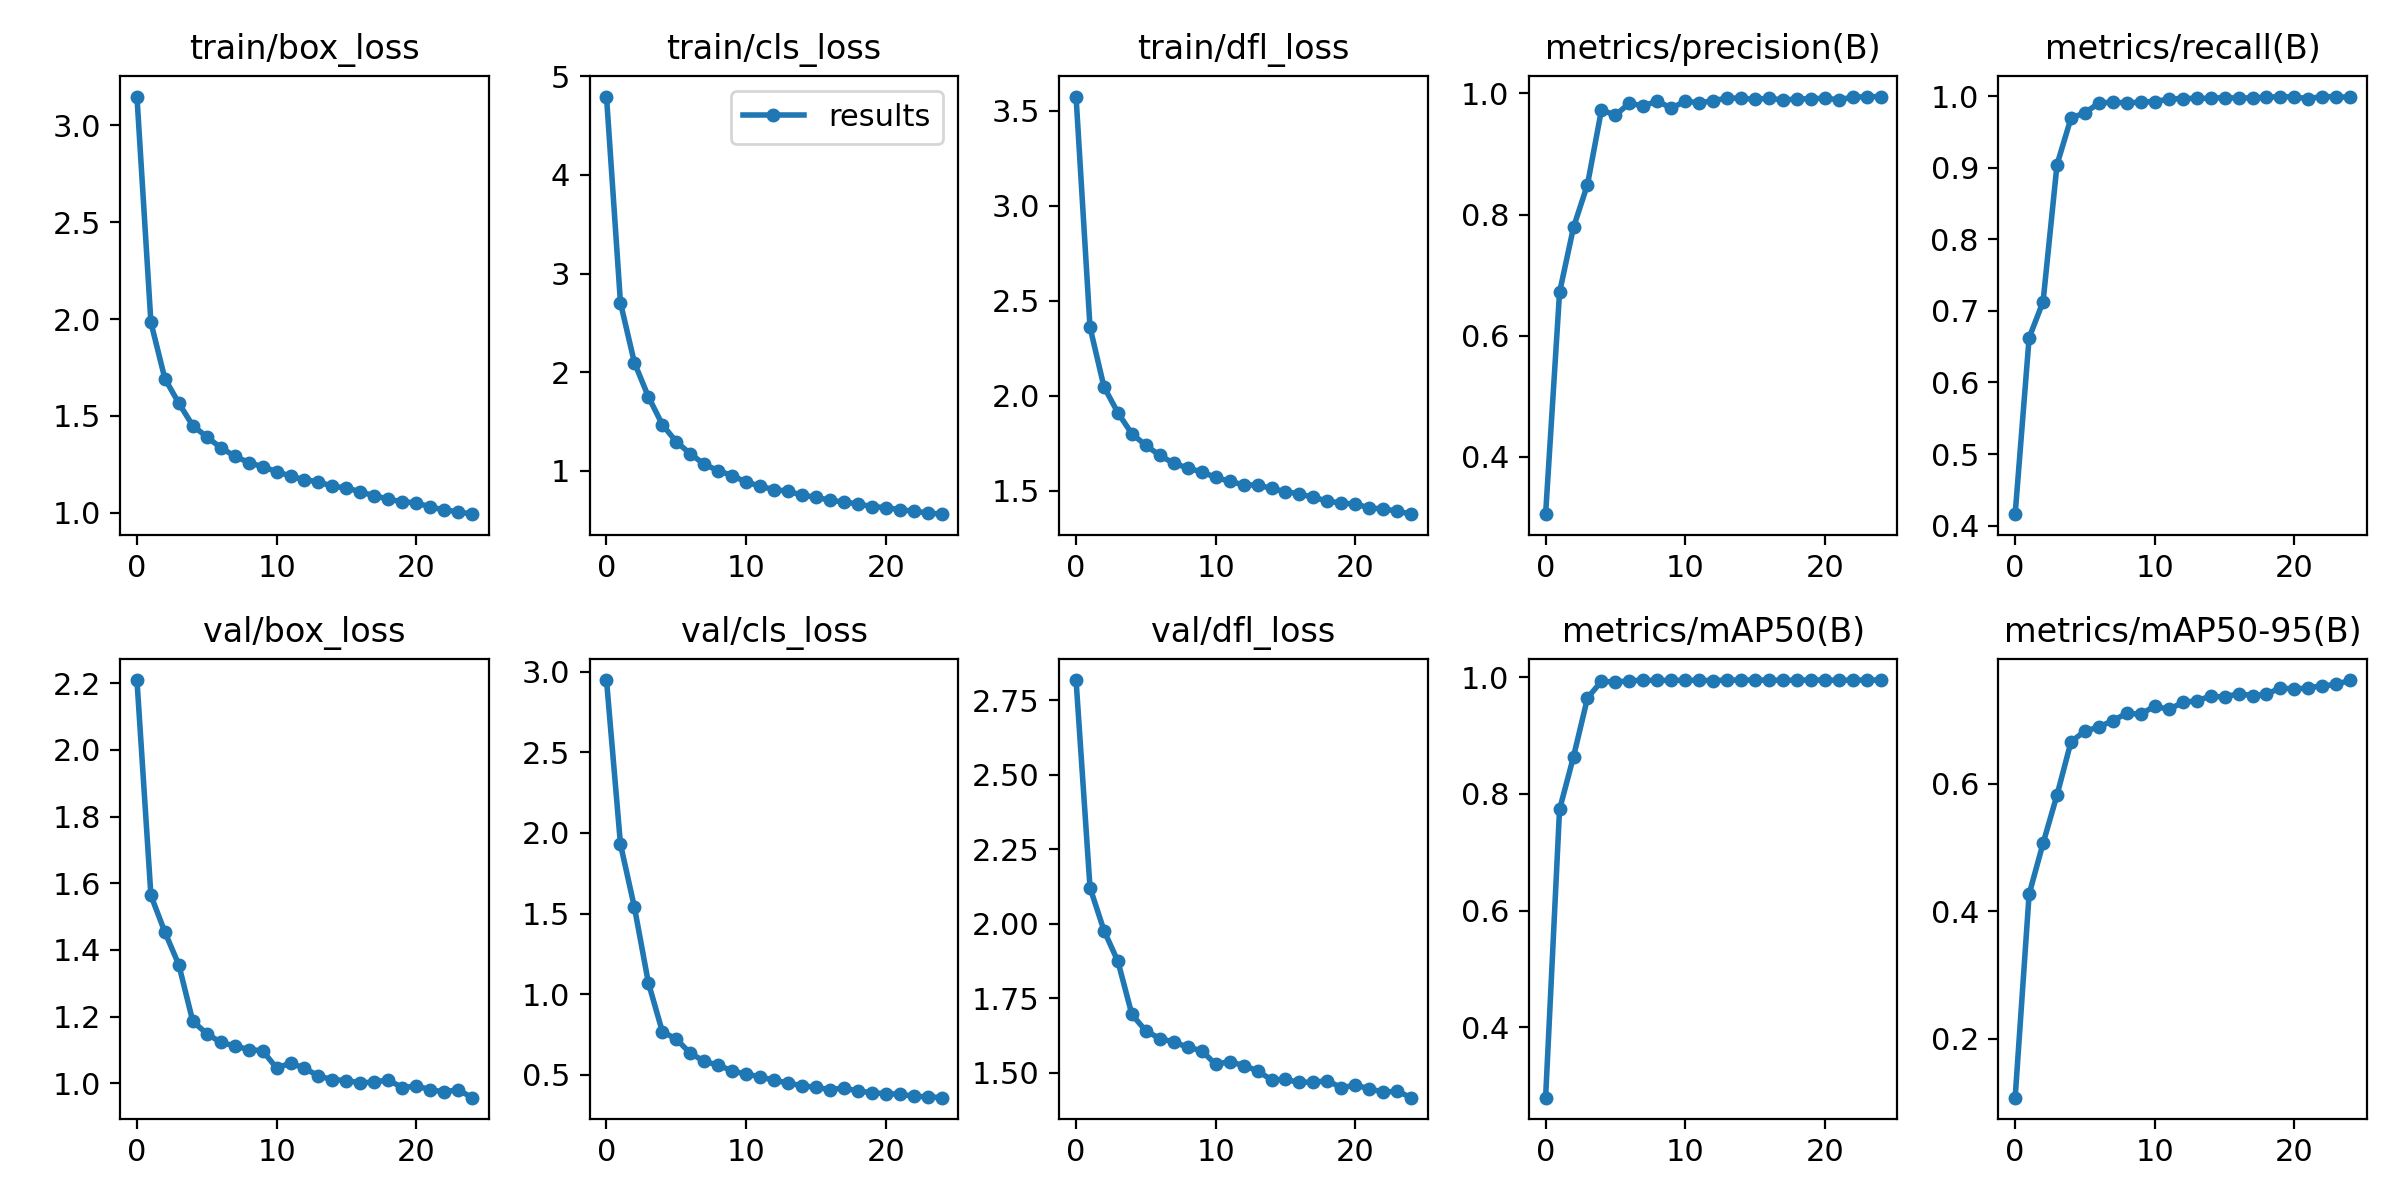

In [17]:
Image(filename=f'/kaggle/working/runs/detect/dws_yolov8m_results/results.png', width=600)